<a href="https://colab.research.google.com/github/AmirJlr/Deep-Learning/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

from keras.datasets import cifar10

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Label	Description :

0	airplane

1	automobile

2	bird

3	cat

4	deer

5	dog

6	frog

7	horse

8	ship

9	truck

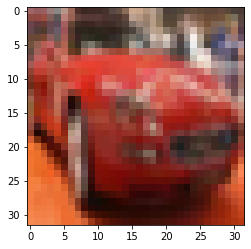

In [3]:
plt.imshow(X_train[5])

In [4]:
y_train[5]

array([1], dtype=uint8)

In [5]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [6]:
# Normalize inputs from 0 - 255 to 0 - 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255


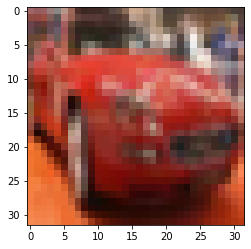

In [7]:
plt.imshow(X_train[5])

In [8]:
# One-Hot encode outputs

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [9]:
y_train[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_train.shape

(50000, 10)

In [11]:
X_train.shape[1:]

(32, 32, 3)

In [12]:
num_classes = y_train.shape[1]
num_classes

10

## Build a **Model**

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape = X_train.shape[1:], activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(32, activation='relu'), 
    Dense(num_classes, activation='softmax')
]
)

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         7

Training The Model :

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128)

Epoch 1/30
391/391 [==============================] - 15s 16ms/step - loss: 1.6002 - accuracy: 0.4145 - val_loss: 1.2705 - val_accuracy: 0.5371
Epoch 2/30
391/391 [==============================] - 6s 14ms/step - loss: 1.1001 - accuracy: 0.6094 - val_loss: 0.9902 - val_accuracy: 0.6613
Epoch 3/30
391/391 [==============================] - 6s 14ms/step - loss: 0.8910 - accuracy: 0.6899 - val_loss: 0.8960 - val_accuracy: 0.6877
Epoch 4/30
391/391 [==============================] - 6s 14ms/step - loss: 0.7612 - accuracy: 0.7363 - val_loss: 0.7711 - val_accuracy: 0.7359
Epoch 5/30
391/391 [==============================] - 6s 14ms/step - loss: 0.6713 - accuracy: 0.7696 - val_loss: 0.7477 - val_accuracy: 0.7441
Epoch 6/30
391/391 [==============================] - 6s 14ms/step - loss: 0.6028 - accuracy: 0.7916 - val_loss: 0.7395 - val_accuracy: 0.7487
Epoch 7/30
391/391 [==============================] - 6s 14ms/step - loss: 0.5437 - accuracy: 0.8125 - val_loss: 0.7405 - val_accuracy: 0.752

In [17]:
for key, val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [18]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.600172,0.41446,1.270533,0.5371
1,1.100113,0.60936,0.990185,0.6613
2,0.890958,0.68988,0.896041,0.6877
3,0.761154,0.73626,0.771088,0.7359
4,0.671265,0.76962,0.747676,0.7441


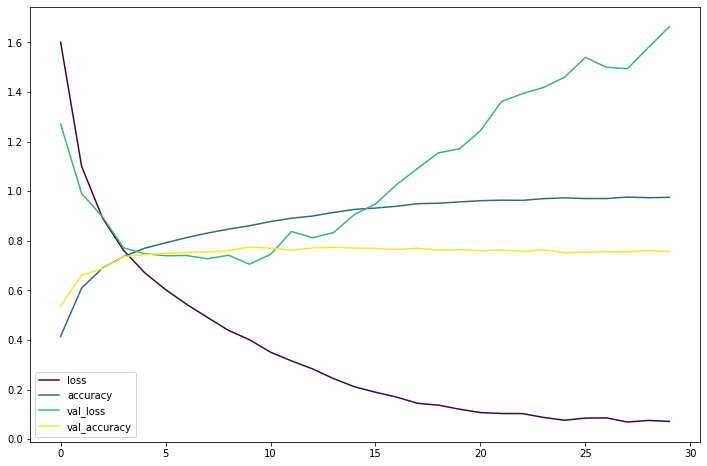

In [19]:
hist_df.plot(figsize=(12,8), cmap='viridis')

## OverFit is comming ...:

**Solutions :**
Data Augmentation (not today, not here...)

Dropout

Batch Normalizatin



Try again (for Training Purpose) :

In [20]:
model_2 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape = X_train.shape[1:], activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(2),
    Dropout(0.3),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(2),
    Dropout(0.3),
    BatchNormalization(),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D(2),
    
    Flatten(),
    Dense(32, activation='relu'), 
    Dropout(0.3),
    BatchNormalization(),

    Dense(num_classes, activation='softmax'),
]
)

In [21]:
model_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

In [23]:
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
391/391 [==============================] - 8s 19ms/step - loss: 1.7462 - accuracy: 0.3673 - val_loss: 2.3748 - val_accuracy: 0.1609
Epoch 2/100
391/391 [==============================] - 7s 17ms/step - loss: 1.3816 - accuracy: 0.5001 - val_loss: 1.1463 - val_accuracy: 0.6014
Epoch 3/100
391/391 [==============================] - 7s 18ms/step - loss: 1.1868 - accuracy: 0.5769 - val_loss: 1.0197 - val_accuracy: 0.6354
Epoch 4/100
391/391 [==============================] - 7s 17ms/step - loss: 1.0642 - accuracy: 0.6239 - val_loss: 0.9508 - val_accuracy: 0.6636
Epoch 5/100
391/391 [==============================] - 7s 18ms/step - loss: 0.9743 - accuracy: 0.6583 - val_loss: 0.8682 - val_accuracy: 0.7004
Epoch 6/100
391/391 [==============================] - 7s 17ms/step - loss: 0.9106 - accuracy: 0.6800 - val_loss: 0.7709 - val_accuracy: 0.7329
Epoch 7/100
391/391 [==============================] - 7s 17ms/step - loss: 0.8668 - accuracy: 0.6967 - val_loss: 0.7685 - val_accuracy:

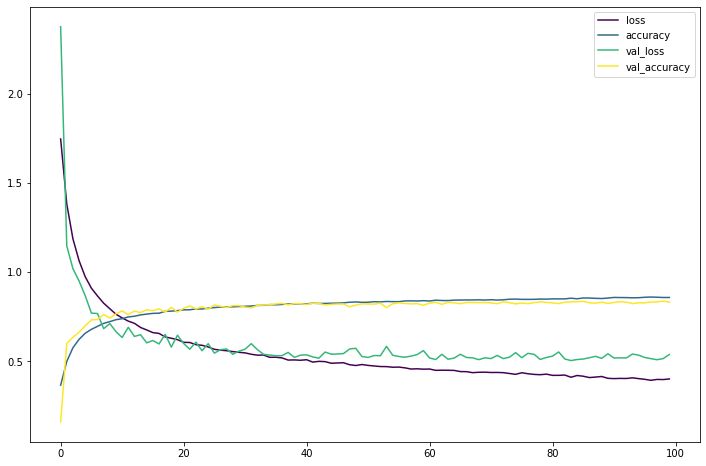

In [24]:
pd.DataFrame(history_2.history).plot(figsize=(12,8), cmap='viridis')

In [25]:
model_2.save('CNN_cifar.h5')

In [26]:
my_model = load_model('CNN_cifar.h5')

In [27]:
my_model.predict(X_test[:10])[0]

# probability to each class for first test image :

1/1 [==============================] - 0s 214ms/step


array([2.0950831e-05, 7.5788157e-05, 6.1873776e-05, 7.1058351e-01,
       8.0209167e-05, 2.8786606e-01, 1.0773328e-03, 1.4206837e-04,
       2.0563461e-05, 7.1657880e-05], dtype=float32)

In [28]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [29]:
labels[3]

'cat'

In [30]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
# Predicting test data
predictions = my_model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)




313/313 [==============================] - 1s 2ms/step


In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

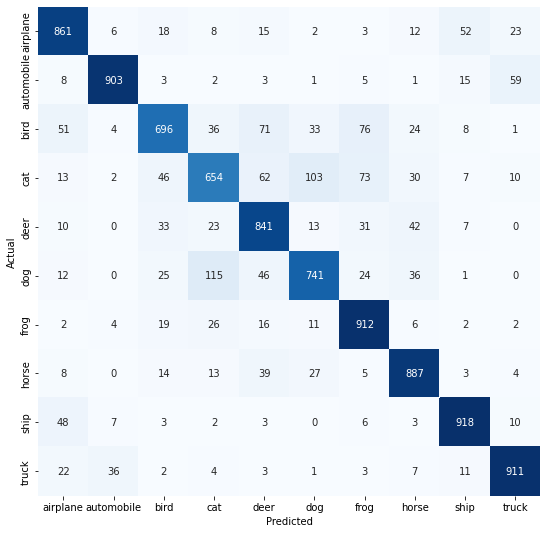

In [33]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

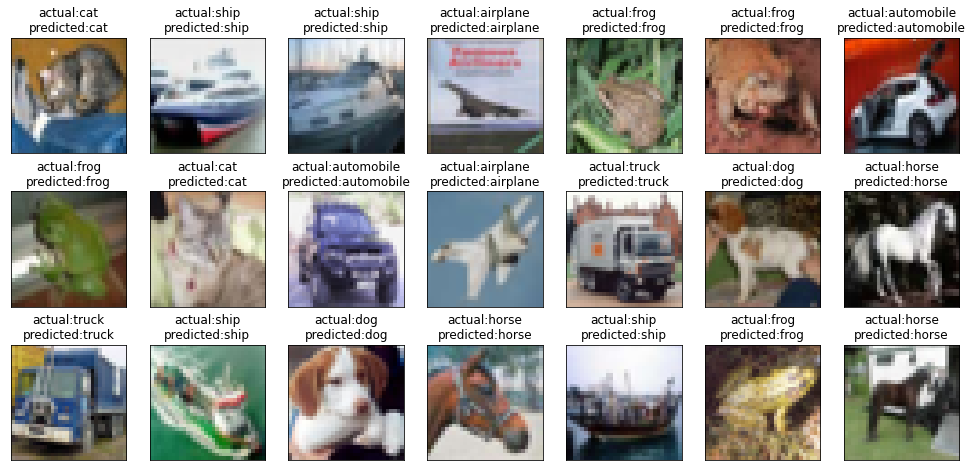

In [34]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()